# Distancias

In [1]:
from scipy.spatial import distance_matrix
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/movies/movies.csv", sep=";")
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [2]:
#Ya que los ids no nos importan:
data_movies = data[["star_wars", "lord_of_the_rings", "harry_potter"]]
data_movies.head()

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6


In [3]:
#No hay que normalizar porque todas las películas están en el rango [0,10]
#Obtenemos la distancia euclídea (por ejemplo, podríamos obtener la que queramos variando p)
d_matrix = pd.DataFrame(distance_matrix(data_movies, data_movies, p=2), index=data["user_id"], columns=data["user_id"])
d_matrix

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


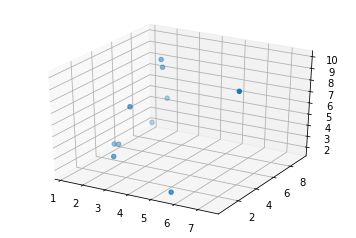

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=data_movies["star_wars"], ys=data["lord_of_the_rings"], zs=data["harry_potter"])

## Clustering aglomerativo

Ejemplo de clustering aglomerativo usando la distancia de manhattan y enlace simple.

In [5]:
d_manhattan = pd.DataFrame(distance_matrix(data_movies, data_movies, p=1), index=data["user_id"], columns=data["user_id"])
d_manhattan

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [6]:
Z = [] #Aqui iremos guardando que grupos unimos, a que distancia etc para luego pintar el dendrograma
d_manhattan[11] = d_manhattan[10] + d_manhattan[1]
d_manhattan.loc[11] = d_manhattan.loc[10] + d_manhattan.loc[1]
Z.append([1, 10, 0.7, 2]) #id1, id2, dist, nelems
for i in d_manhattan.columns.values:
    d_manhattan.loc[11][i] = d_manhattan.loc[i][11] = min(d_manhattan.loc[1][i], d_manhattan.loc[10][i])
    
d_manhattan

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [7]:
#Ya no necesitamos esos dos puntos porque forman parte de un cluster conjunto
d_manhattan.drop([1,10], axis=0, inplace=True)
d_manhattan.drop([1,10], axis=1, inplace=True)
d_manhattan

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [8]:
#hacemos una función para no tener que hacer lo mismo todo el rato, solo tenemos que observar el menor numero ahora
def join_clusters(x, y):
    new_index = max(d_manhattan.columns.values) + 1
    d_manhattan[new_index] = d_manhattan[x] + d_manhattan[y]
    d_manhattan.loc[new_index] = d_manhattan.loc[x] + d_manhattan.loc[y]
    Z.append([x, y, d_manhattan.loc[x][y], 2]) #id1, id2, dist, nelems
    for i in d_manhattan.columns.values:
        d_manhattan.loc[new_index][i] = d_manhattan.loc[i][new_index] = min(d_manhattan.loc[x][i], d_manhattan.loc[y][i])
    d_manhattan.drop([x,y], axis=0, inplace=True)
    d_manhattan.drop([x,y], axis=1, inplace=True)
join_clusters(2, 7)
d_manhattan

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [9]:
join_clusters(5, 8)
d_manhattan

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [10]:
join_clusters(11, 13)
d_manhattan

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


Ahora tenemos que juntar 3 clusters así que no nos sirve la función porque estaba hecha para juntar 2 clusters

In [11]:
def join_clusters(x, y, z):
    new_index = max(d_manhattan.columns.values) + 1
    d_manhattan[new_index] = d_manhattan[x] + d_manhattan[y]
    d_manhattan.loc[new_index] = d_manhattan.loc[x] + d_manhattan.loc[y]
    Z.append([x, y, z, d_manhattan.loc[x][y], 3]) #id1, id2, dist, nelems
    for i in d_manhattan.columns.values:
        d_manhattan.loc[new_index][i] = d_manhattan.loc[i][new_index] = min(d_manhattan.loc[x][i], d_manhattan.loc[y][i], d_manhattan.loc[z][i])
    d_manhattan.drop([x,y,z], axis=0, inplace=True)
    d_manhattan.drop([x,y,z], axis=1, inplace=True)
join_clusters(9,12,14)
d_manhattan

user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


In [12]:
join_clusters(4,6,15)
d_manhattan

user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


In [13]:
#Como son 2 de nuevo hay que volver a cambiar la función
def join_clusters(x, y):
    new_index = max(d_manhattan.columns.values) + 1
    d_manhattan[new_index] = d_manhattan[x] + d_manhattan[y]
    d_manhattan.loc[new_index] = d_manhattan.loc[x] + d_manhattan.loc[y]
    Z.append([x, y, d_manhattan.loc[x][y], 2]) #id1, id2, dist, nelems
    for i in d_manhattan.columns.values:
        d_manhattan.loc[new_index][i] = d_manhattan.loc[i][new_index] = min(d_manhattan.loc[x][i], d_manhattan.loc[y][i])
    d_manhattan.drop([x,y], axis=0, inplace=True)
    d_manhattan.drop([x,y], axis=1, inplace=True)
join_clusters(3, 16)
d_manhattan

user_id,17
user_id,
17,0.0


In [14]:
#Todas las uniones que hemos hecho:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.79999999999999938, 2],
 [5, 8, 3.2000000000000002, 2],
 [11, 13, 3.9000000000000008, 2],
 [9, 12, 14, 11.699999999999999, 3],
 [4, 6, 15, 11.0, 3],
 [3, 16, 9.0, 2]]

## Clustering jerarquico usando Python

In [20]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#Podemos hacer un clustering indicando el metodo de medida de distancias
#Tambien puede ser "average", "complete", "single"...
Z = linkage(data_movies, "ward")
#Nos muestra los nodos que se unen, la distancia a la que estaban y cuantos elementos se unen
Z

array([[  0.        ,   9.        ,   0.41231056,   2.        ],
       [  1.        ,   6.        ,   0.6164414 ,   2.        ],
       [  4.        ,   7.        ,   2.16794834,   2.        ],
       [  3.        ,   8.        ,   3.48281495,   2.        ],
       [  5.        ,  10.        ,   5.2943366 ,   3.        ],
       [ 13.        ,  14.        ,   6.59317829,   5.        ],
       [ 11.        ,  12.        ,   6.66408283,   4.        ],
       [  2.        ,  15.        ,  10.62355873,   6.        ],
       [ 16.        ,  17.        ,  12.8156935 ,  10.        ]])

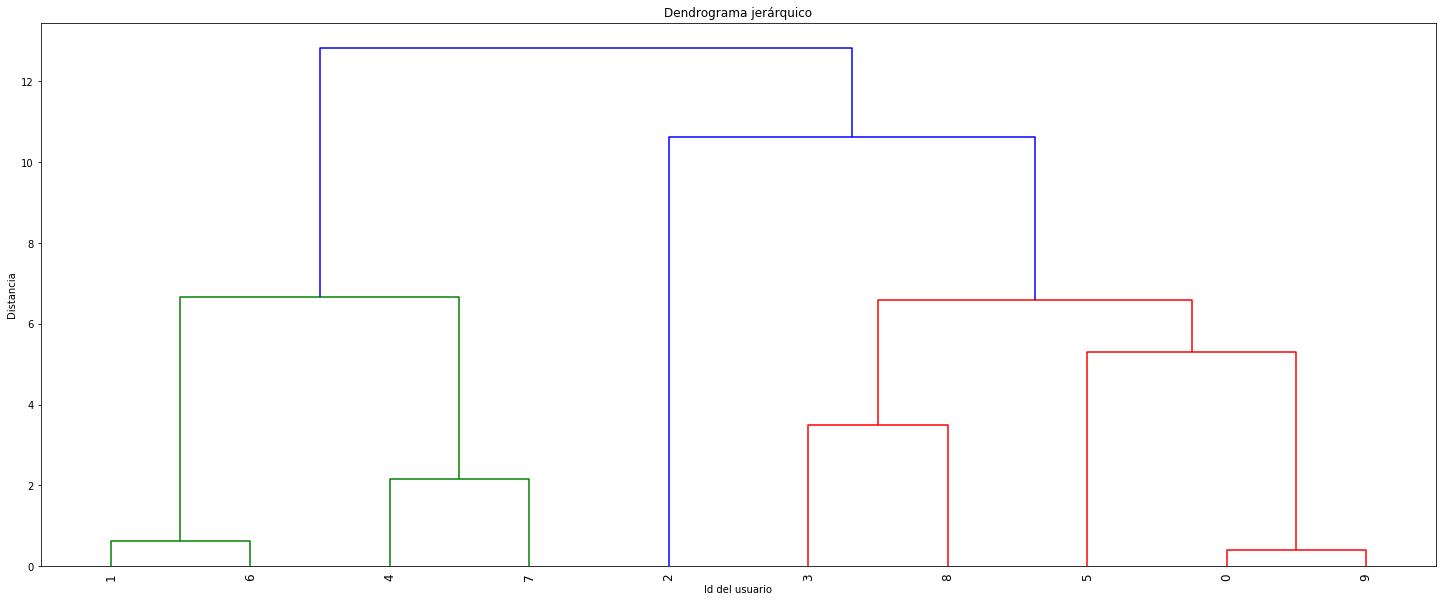

In [28]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma jerárquico")
plt.xlabel("Id del usuario")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90.)
plt.show()